# 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import time as dt
import sklearn.datasets
import seaborn as sns
dictx=dict()

california_housing=sklearn.datasets.fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# 2

In [8]:
X=pd.DataFrame(california_housing['data'])
X.shape

(20640, 8)

In [3]:
y=pd.DataFrame(california_housing['target'])
y

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# 3 & 4

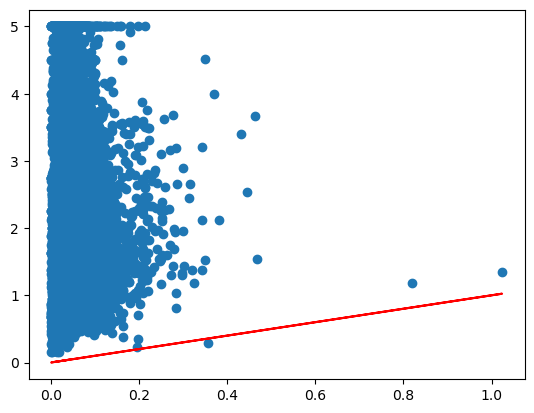

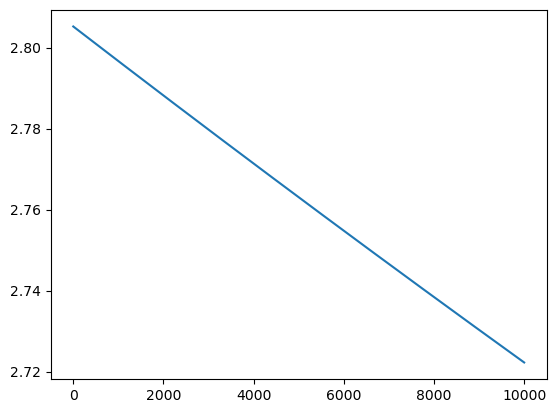


Error after gradient descent = 2.722263040080887
Mean Absolute Percentage Error = 97.32%
R2 Score = -3.0889
Root of Mean Squared Error = 2.33
Mean Squared Error = 5.44
Mean Absolute Error = 2.03
Study Time = 74261.15322113037 ms
        


In [4]:
import pandas as pd
import numpy as np
import time as dt
import matplotlib.pyplot as plt

class Model(object):
    """Модель линейной регрессии"""
    def __init__(self, shape,alpha=0.01,max_steps=1000):
        """Initialize Model

        Args:
            shape (tuple-like): shape of X dataset
        """
        
        self.shape = shape
        self.alpha=alpha
        self.max_steps=max_steps
        self.b = np.zeros([self.shape[1] + 1, 1])
        self.x0 = pd.DataFrame({'x0': np.ones(self.shape[0])})
        
    def predict(self, X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        
        return X @ self.b
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
            
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))
    
    def fit(self, X, Y, accuracy=0.01):
        alpha=self.alpha
        max_steps=self.max_steps
        start_time = dt.time()
        x_all = pd.concat([self.x0, X], axis=1)
        self.x_all = x_all
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ_b = -1/self.shape[0] * x_all.T @ (Y - self.predict(x_all))
            self.b -= alpha * dJ_b
            new_err = self.error(Y).iloc[0,0]
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        self.errors=errors
        self.steps=steps
        
        stop_time=dt.time()
        self.study_time_seconds = stop_time-start_time
        
        return steps, errors, self.b
    
    
    def plot(self, Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all

        yy=self.predict()
        plt.scatter(yy,Y)
        plt.plot(yy,yy,c='r')
        plt.show()
    
    def study_plot(self):
        plt.plot(self.steps,self.errors)
        plt.show()
    
    def score(self, Y,X=pd.DataFrame() ):
        y_pred = np.array(self.predict())
        Y=np.array(Y)
        ss_res = np.sum((Y - y_pred)**2)
        ss_total = np.sum((Y - np.mean(Y))**2)
        r2 = 1 - (ss_res / ss_total)
        return r2

    def MSE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MSE = np.mean((Y_pred - Y)**2)
        return MSE

    def RMSE(self, Y,X=pd.DataFrame() ):
        return np.sqrt(self.MSE(Y))

    def MAE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAE = np.mean(abs(Y_pred - Y))
        return MAE

    def MAPE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAPE = np.mean(abs(Y_pred - Y)/Y)*100
        return MAPE
    
    def show_metrics(self, y,X=pd.DataFrame() ):
        text=f'''
Error after gradient descent = {self.error(y).iloc[0,0]}
Mean Absolute Percentage Error = {round(self.MAPE(y),2)}%
R2 Score = {round(self.score(y),4)}
Root of Mean Squared Error = {round(self.RMSE(y),2)}
Mean Squared Error = {round(self.MSE(y),2)}
Mean Absolute Error = {round(self.MAE(y),2)}
Study Time = {self.study_time_seconds*1000} ms
        '''
        print(text)
    
    def complex_out(self,x,y,show_plots=True):
        self.fit(x, y)
        if show_plots:
            self.plot(y)
            self.study_plot()
        self.show_metrics(y)

model = Model(X.shape,1e-12,10000)
model.complex_out(X, y)
dictx['Just LinReg']=(model.study_time_seconds*1000,model.score(y),model.MSE(y))

In [ ]:
X

# 5 & 6

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_mm=pd.DataFrame(scaler.transform(X))
X_mm

,0,1,2,3,4,5,6,7
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [6]:
model = Model(X_mm.shape,0.01,10000)
model.complex_out(X_mm, y)
dictx['MinMax LinReg']=(model.study_time_seconds*1000,model.score(y),model.MSE(y))

KeyboardInterrupt: 

# 7

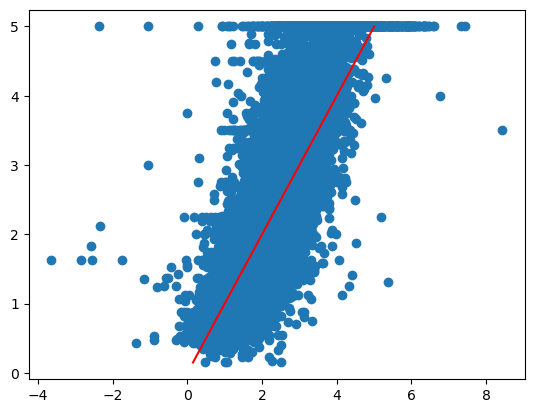

Degree = 2
Study time = 23.138999938964844 ms
Score = 0.6832976293317468
Mean Squared Error = 0.42170513669993254


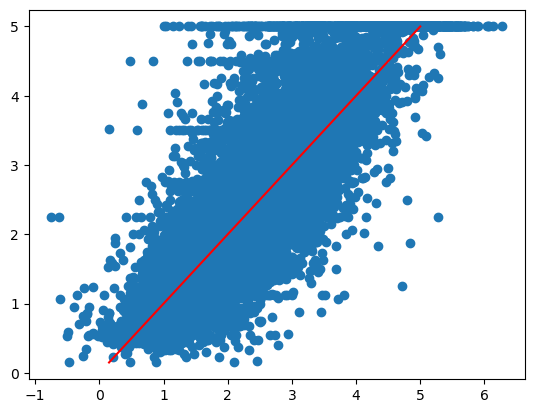

Degree = 3
Study time = 69.67353820800781 ms
Score = 0.7371197634633873
Mean Squared Error = 0.35003825784590326


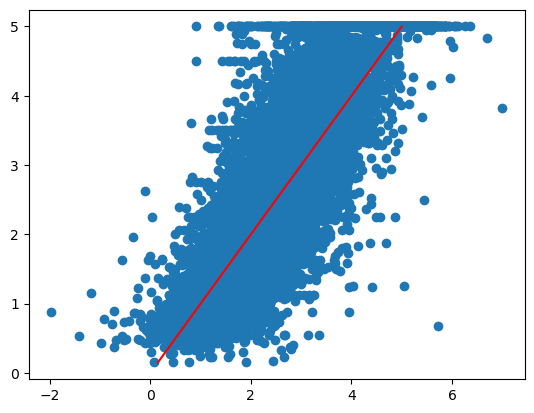

Degree = 4
Study time = 260.0433826446533 ms
Score = 0.745185360854038
Mean Squared Error = 0.33929850922004323


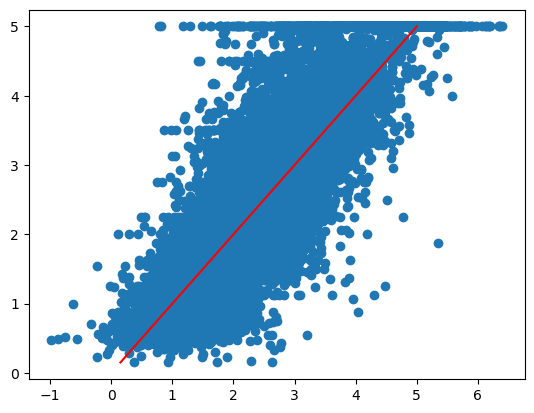

Degree = 5
Study time = 910.1827144622803 ms
Score = 0.7440741587072441
Mean Squared Error = 0.3407781307720581


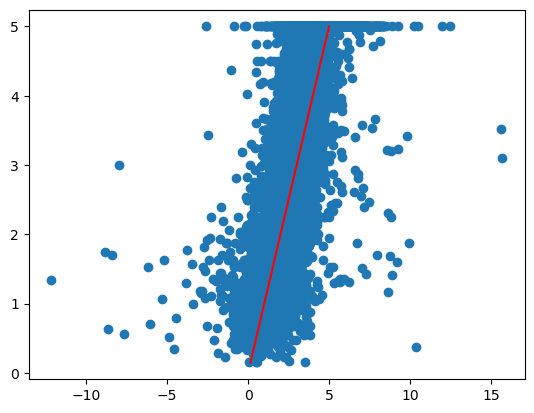

Degree = 6
Study time = 5204.350471496582 ms
Score = 0.45963197593877314
Mean Squared Error = 0.7195272045933401


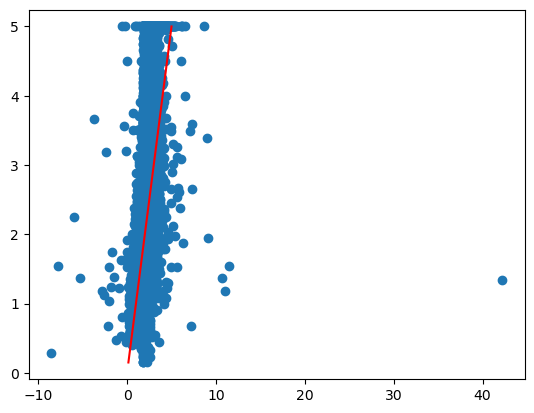

Degree = 7
Study time = 43310.08005142212 ms
Score = 0.15872491327276694
Mean Squared Error = 1.120200094182996


In [7]:
from sklearn.metrics import mean_squared_error

degrees=range(2,8)

for deg in degrees:
        xp=X
        pf = PolynomialFeatures(degree=deg)
        xp = pf.fit_transform(xp)
        
        binary = LinearRegression()
        start_time = dt.time()
        binary.fit(xp, y)
        stop_time=dt.time()
        
        

        
        plt.scatter(binary.predict(xp), y)
        plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='red')
        plt.show()
        print(f'Degree = {deg}')
        print(f'Study time = {(stop_time-start_time)*1000} ms')
        print(f'Score = {binary.score(xp,y)}')
        mse=(mean_squared_error(y,binary.predict(xp)))
        print(f'Mean Squared Error = {mse}')
        dictx[f'Degree {deg}']=((stop_time-start_time)*1000,binary.score(xp,y),mse)

In [8]:
dictx

{'Just LinReg': (67981.50777816772, -3.0888624934613977, 5.444526080161772),
 'MinMax LinReg': (69113.54088783264, 0.5338265991941076, 0.6207333317332429),
 'Degree 2': (23.138999938964844, 0.6832976293317468, 0.42170513669993254),
 'Degree 3': (69.67353820800781, 0.7371197634633873, 0.35003825784590326),
 'Degree 4': (260.0433826446533, 0.745185360854038, 0.33929850922004323),
 'Degree 5': (910.1827144622803, 0.7440741587072441, 0.3407781307720581),
 'Degree 6': (5204.350471496582, 0.45963197593877314, 0.7195272045933401),
 'Degree 7': (43310.08005142212, 0.15872491327276694, 1.120200094182996)}

In [13]:
table=pd.DataFrame(np.vstack((np.array([i for i in list(dictx.keys())]),*np.array(list(zip(*list(dictx.values())))))).transpose(),columns=['Model','Study time, ms','Score','MSE'])
table = table.set_index('Model')

table

,"Study time, ms",Score,MSE
Model,,,
Just LinReg,67981.50777816772,-3.0888624934613977,5.444526080161772
MinMax LinReg,69113.54088783264,0.5338265991941076,0.6207333317332429
Degree 2,23.138999938964844,0.6832976293317468,0.42170513669993254
Degree 3,69.67353820800781,0.7371197634633873,0.35003825784590326
Degree 4,260.0433826446533,0.745185360854038,0.33929850922004323
Degree 5,910.1827144622803,0.7440741587072441,0.3407781307720581
Degree 6,5204.350471496582,0.45963197593877314,0.7195272045933401
Degree 7,43310.08005142212,0.15872491327276694,1.120200094182996


In [24]:

X

,Y,X1,X2,X3,X4,X5,X6,X7,X8
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Проанализируем ряды данных.


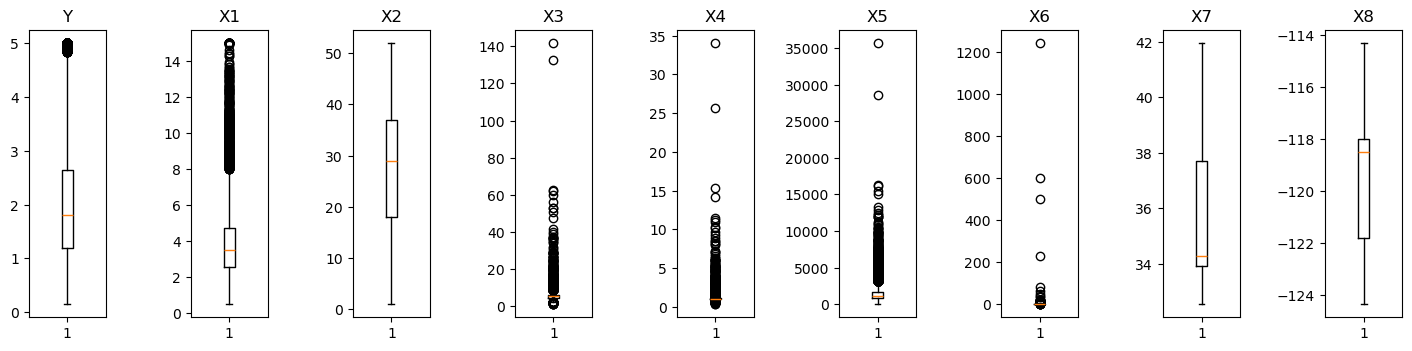

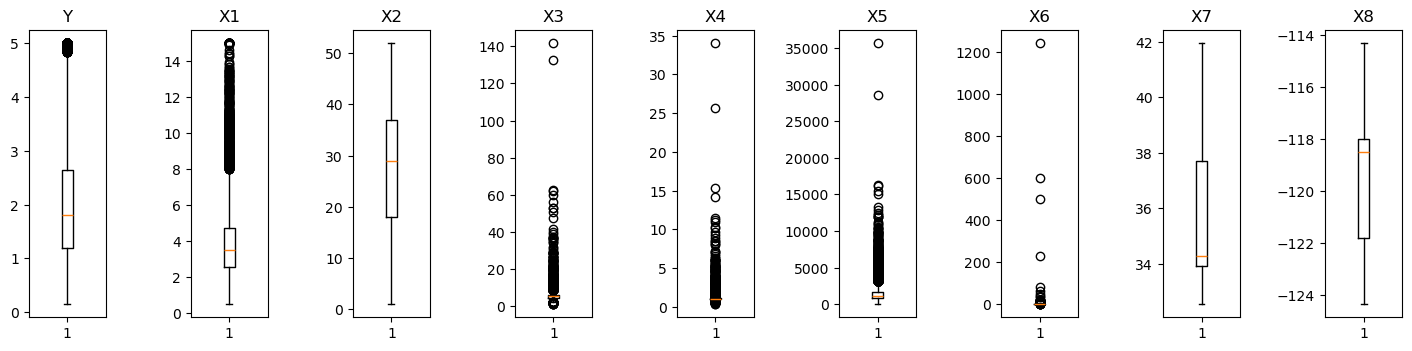

Построим диаграммы рассеяния Y с регрессорами.


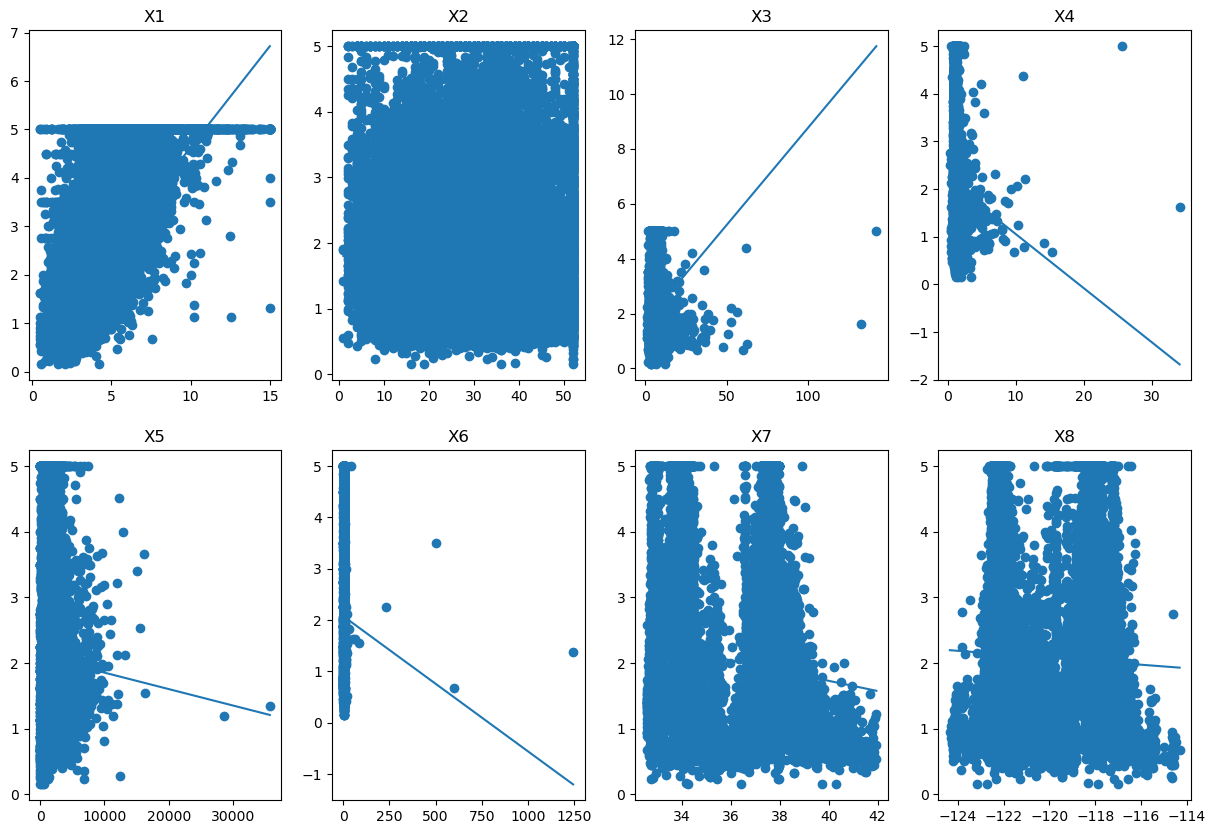

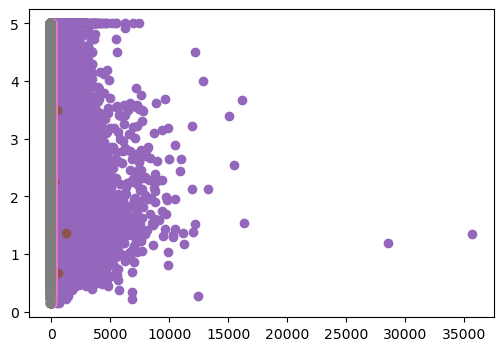

Построим корреляционную матрицу и проведем ее анализ.


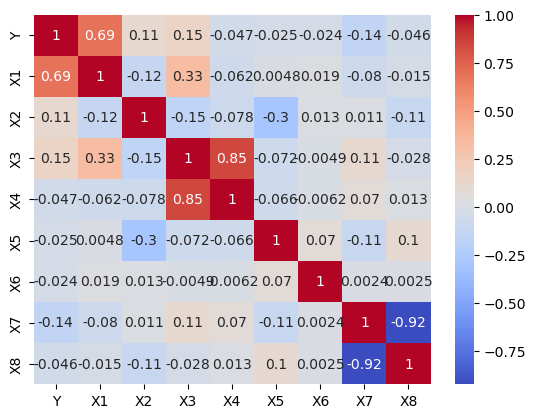

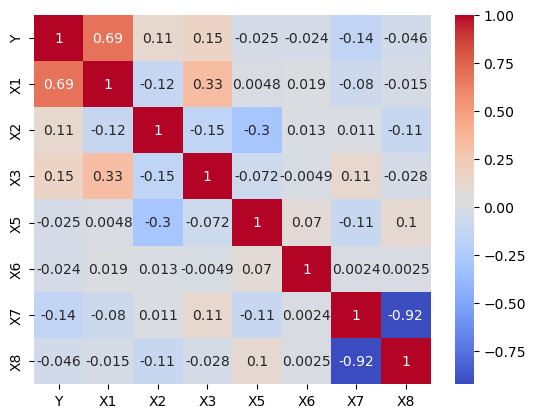

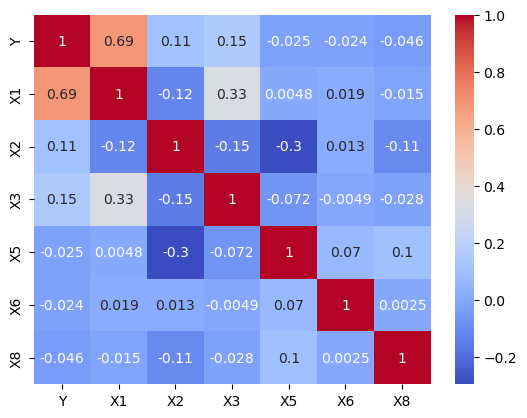

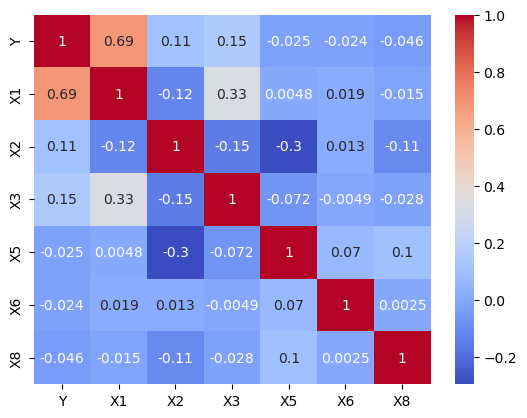

Связь между Y и X1 - ПРЯМАЯ УМЕРЕННАЯ (коэффициент корреляции 0.688 - статистически значим)

Связь между Y и X2 - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.106 - статистически значим)

Связь между Y и X3 - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.152 - статистически значим)

Связь между Y и X5 - ОБРАТНАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции -0.025 - статистически значим)

Связь между Y и X6 - ОБРАТНАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции -0.024 - статистически значим)

Связь между Y и X8 - ОБРАТНАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции -0.046 - статистически значим)

Связь между X1 и X2 - ОБРАТНАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции -0.119 - статистически значим)

Связь между X1 и X3 - ПРЯМАЯ СЛАБАЯ(коэффициент корреляции 0.327 - статистически значим)

Связь между X1 и X5 - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.005 - статистически значим)

Связь между X1 и X6 - ПРЯМАЯ ОЧЕНЬ СЛАБАЯ (коэффициент корреляции 0.019 - статистически значим)

Связь между X1 и X8 - ОБРАТНАЯ ОЧЕ

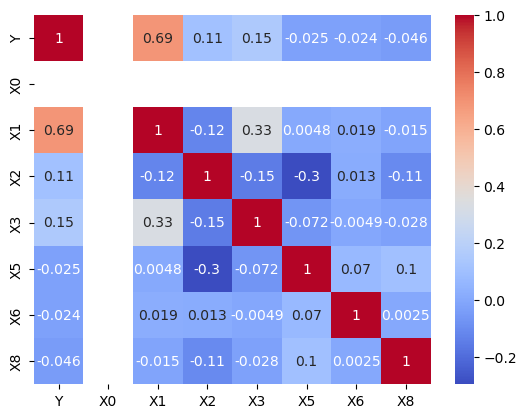

Найдем детерминант модели 0.5147464667149975.
И построим график регрессии


c:\Users\ivant\Desktop\proj\FU\Course_2\ML\Boxan_obj.py:405: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.p_values={self.x_col.columns[i]: self.model.pvalues[i] for i in range(0, len(self.x_col.columns))}


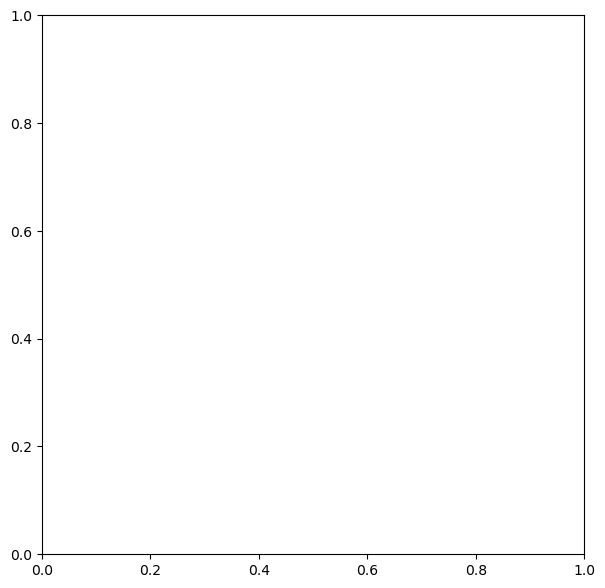

Попробуем сделать то же самое, но на моей модели


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import time as dt
import sklearn.datasets
import seaborn as sns
from Boxan_obj import *    
dictx=dict()

california_housing=sklearn.datasets.fetch_california_housing()
california_housing

y=pd.DataFrame(california_housing['target'])
X=pd.DataFrame(california_housing['data'])

X.columns=pd.Index(['X'+str(i) for i in range(1,9)])
X.insert(0,'Y',y.iloc[:,0])

analysys = BoxAn(X)
YX=analysys.complex_analysis()

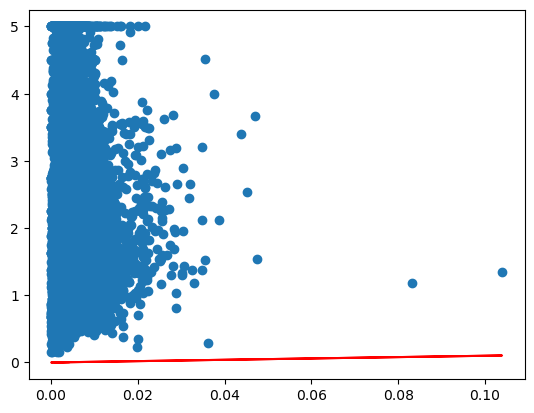

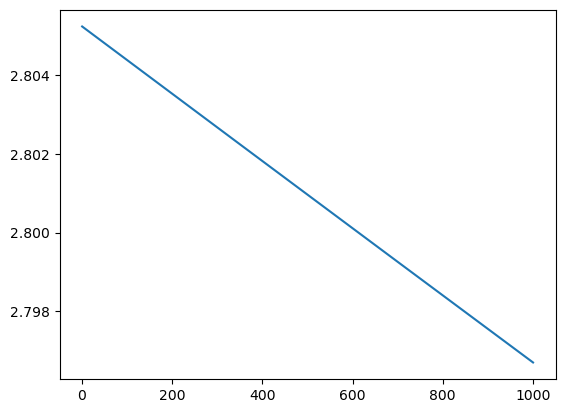


Error after gradient descent = 2.796698984111183
Mean Absolute Percentage Error = 99.73%
R2 Score = -3.2007
Root of Mean Squared Error = 2.37
Mean Squared Error = 5.59
Mean Absolute Error = 2.06
Study Time = 6604.532718658447 ms
        


In [13]:
import pandas as pd
import numpy as np
import time as dt
import matplotlib.pyplot as plt

class Model(object):
    """Модель линейной регрессии"""
    def __init__(self, shape,alpha=0.01,max_steps=1000):
        """Initialize Model

        Args:
            shape (tuple-like): shape of X dataset
        """
        
        self.shape = shape
        self.alpha=alpha
        self.max_steps=max_steps
        self.b = np.zeros([self.shape[1] + 1, 1])
        self.x0 = pd.DataFrame({'x0': np.ones(self.shape[0])})
        
    def predict(self, X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
        
        return X @ self.b
    
    def error(self,Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all
            
        return 1/(2*self.shape[0]) * (Y - self.predict(X)).T @ (Y - self.predict(X))
    
    def fit(self, X, Y, accuracy=0.01):
        alpha=self.alpha
        max_steps=self.max_steps
        start_time = dt.time()
        x_all = pd.concat([self.x0, X], axis=1)
        self.x_all = x_all
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ_b = -1/self.shape[0] * x_all.T @ (Y - self.predict(x_all))
            self.b -= alpha * dJ_b
            new_err = self.error(Y).iloc[0,0]
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        self.errors=errors
        self.steps=steps
        
        stop_time=dt.time()
        self.study_time_seconds = stop_time-start_time
        
        return steps, errors, self.b
    
    
    def plot(self, Y,X=pd.DataFrame()):
        if X.shape==(0,0):
            X=self.x_all

        yy=self.predict()
        plt.scatter(yy,Y)
        plt.plot(yy,yy,c='r')
        plt.show()
    
    def study_plot(self):
        plt.plot(self.steps,self.errors)
        plt.show()
    
    def score(self, Y,X=pd.DataFrame() ):
        y_pred = np.array(self.predict())
        Y=np.array(Y)
        ss_res = np.sum((Y - y_pred)**2)
        ss_total = np.sum((Y - np.mean(Y))**2)
        r2 = 1 - (ss_res / ss_total)
        return r2

    def MSE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MSE = np.mean((Y_pred - Y)**2)
        return MSE

    def RMSE(self, Y,X=pd.DataFrame() ):
        return np.sqrt(self.MSE(Y))

    def MAE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAE = np.mean(abs(Y_pred - Y))
        return MAE

    def MAPE(self, Y,X=pd.DataFrame() ):
        Y_pred = self.predict()
        MAPE = np.mean(abs(Y_pred - Y)/Y)*100
        return MAPE
    
    def show_metrics(self, y,X=pd.DataFrame() ):
        text=f'''
Error after gradient descent = {self.error(y).iloc[0,0]}
Mean Absolute Percentage Error = {round(self.MAPE(y),2)}%
R2 Score = {round(self.score(y),4)}
Root of Mean Squared Error = {round(self.RMSE(y),2)}
Mean Squared Error = {round(self.MSE(y),2)}
Mean Absolute Error = {round(self.MAE(y),2)}
Study Time = {self.study_time_seconds*1000} ms
        '''
        print(text)
    
    def complex_out(self,x,y,show_plots=True):
        self.fit(x, y)
        if show_plots:
            self.plot(y)
            self.study_plot()
        self.show_metrics(y)




y=pd.DataFrame(YX.iloc[:,0])
y.columns=pd.Index([0])
X=pd.DataFrame(YX.iloc[:,1:])
X.columns=pd.Index(range(X.shape[1]))
X=X.drop([0],axis=1)

model=Model(X.shape,1e-12,1000)
model.complex_out(X, y)